# Tutorial 1  for JetSeT 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import numpy as np
from matplotlib import pyplot as plt


## Basic setup and access to Jet class

In [2]:
import jetset

In [3]:
print(jetset.__version__)

1.3.0rc7


See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html


In [4]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution='lppl')

===> setting C threads to 12


In [5]:
Jet.available_electron_distributions()


lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
superexp: powerlaw with super-exp cut-off


In [6]:
my_jet.show_pars()


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


In [7]:
my_jet.parameters.par_table


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str16,str21,object,float64,float64,float64,bool,bool
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


In [8]:
my_jet.show_model()



--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


In [9]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [10]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

In [11]:
my_jet.show_electron_distribution()


--------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False



model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,B,magnetic_field,gauss,2.000000e-01,0.000000e+00,--,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+03,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,R,region_size,cm,1.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,5.000000e+03,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False


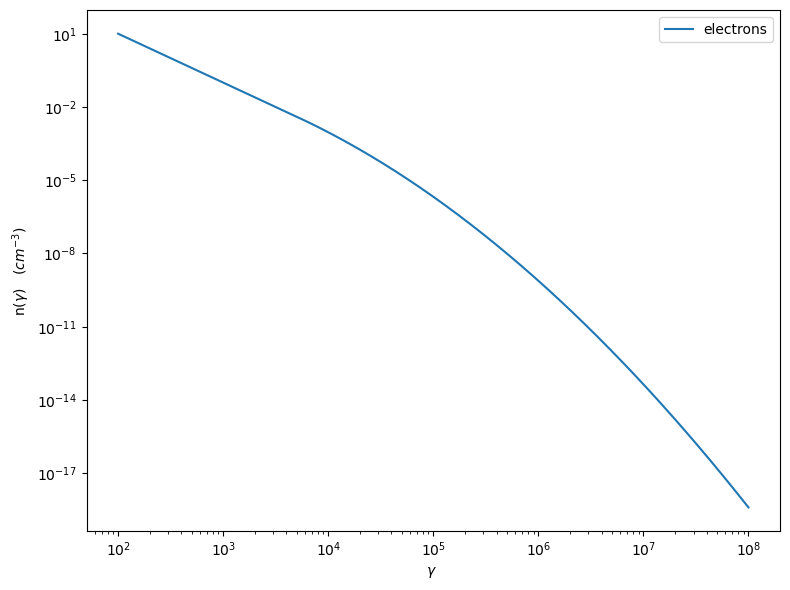

In [12]:
p=my_jet.electron_distribution.plot()

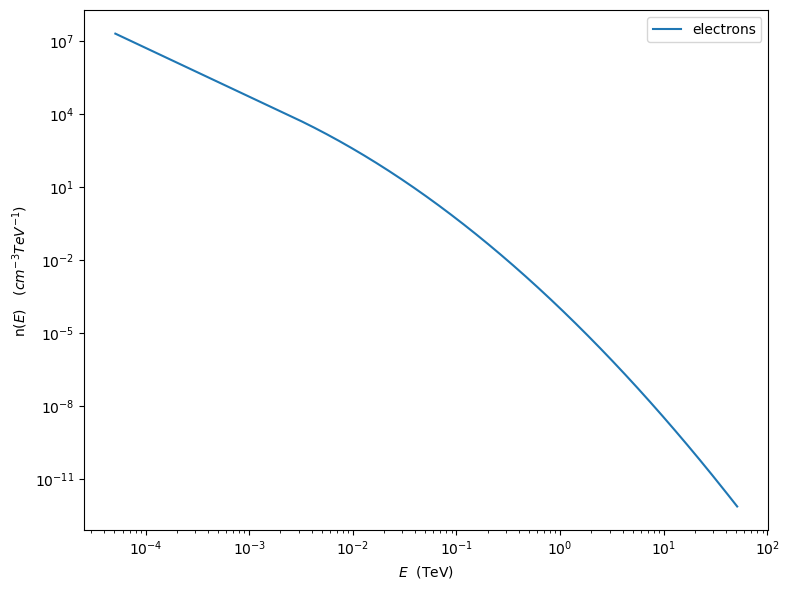

In [13]:
p=my_jet.electron_distribution.plot(energy_unit='TeV')

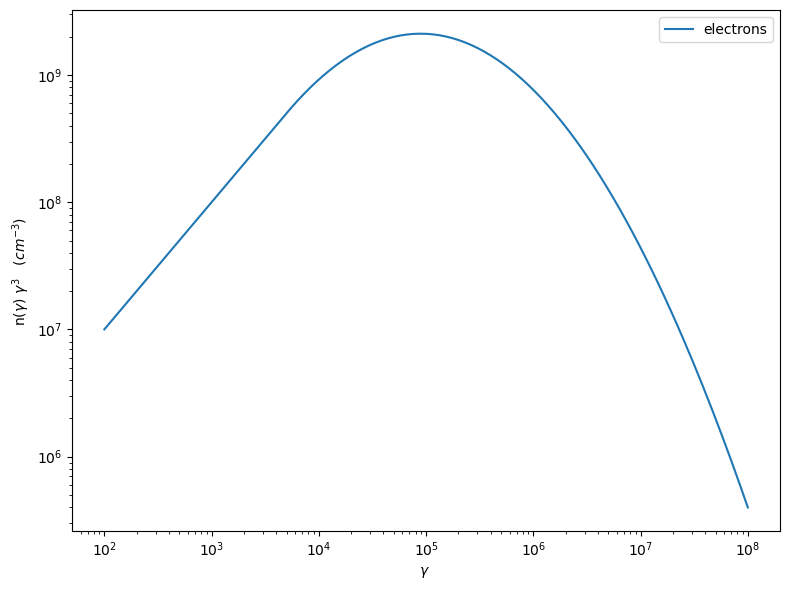

In [14]:
p=my_jet.electron_distribution.plot3p()


In [15]:
my_jet.eval()

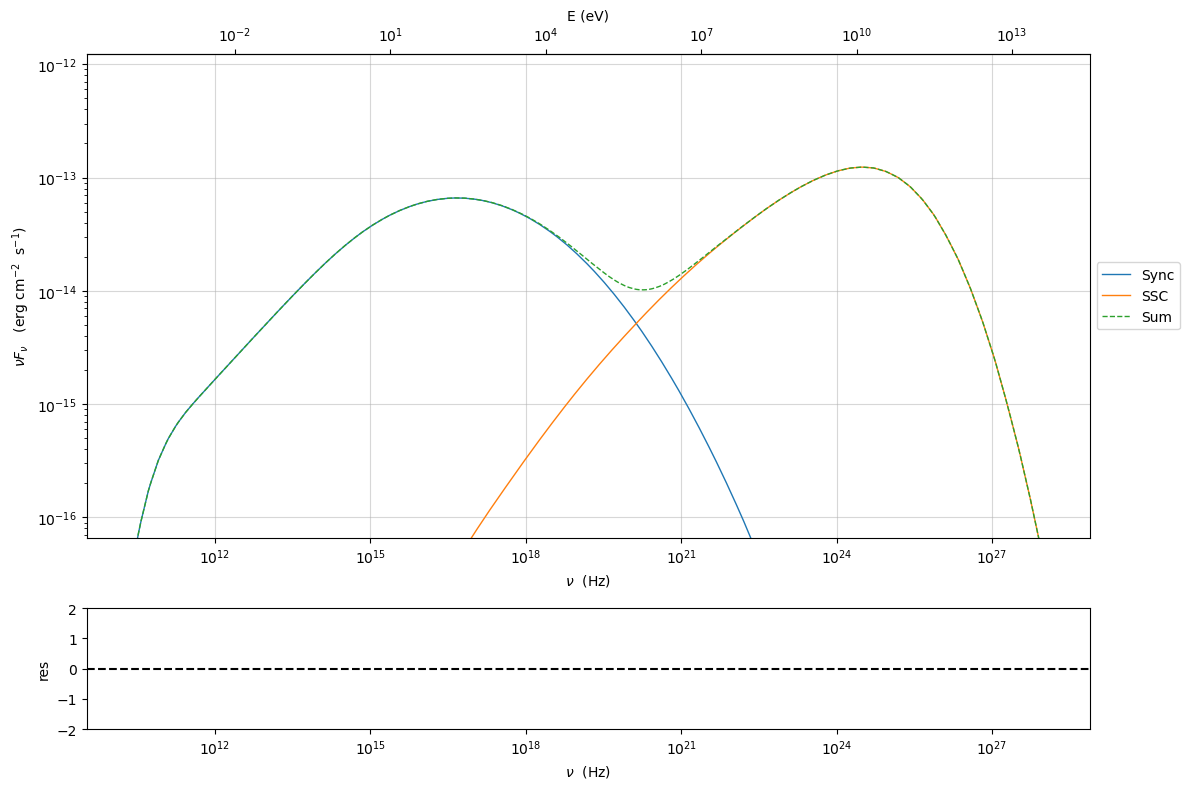

In [16]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_plot=my_jet.plot_model(plot_obj=my_plot)


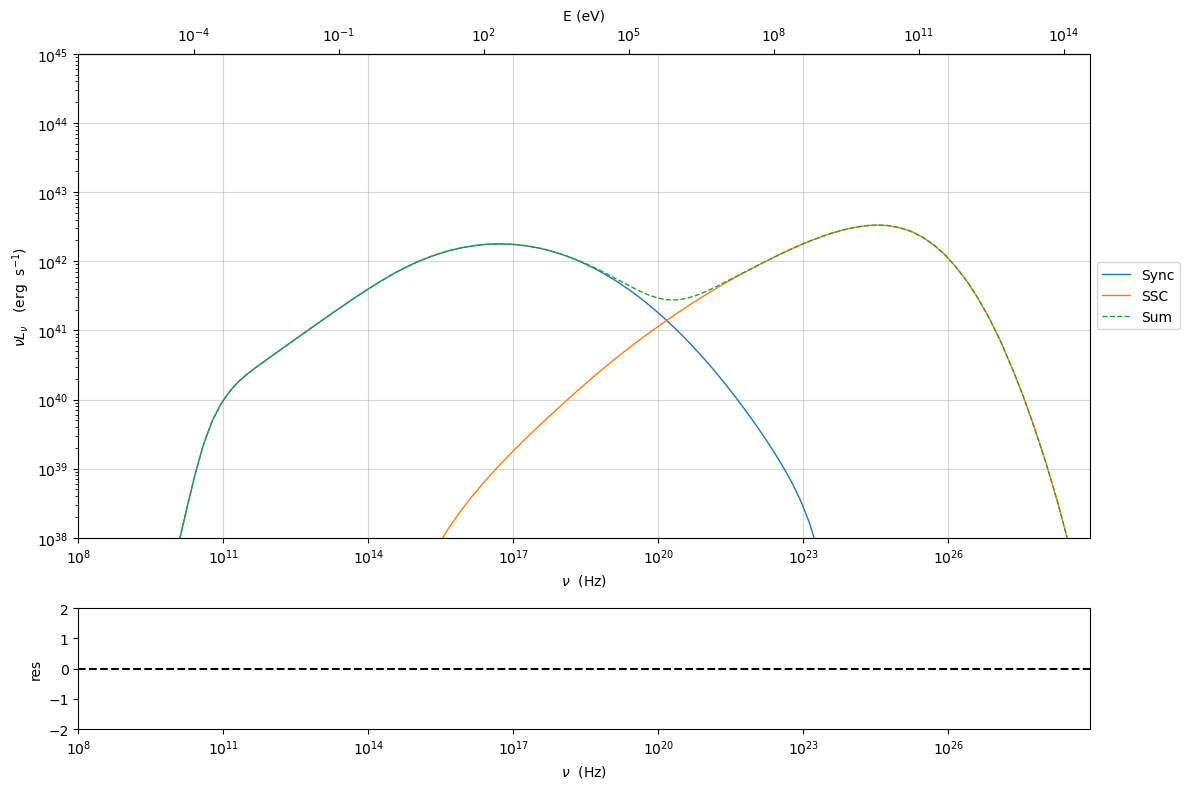

In [17]:
my_plot=my_jet.plot_model(frame='src')
my_plot.setlim(y_max=1E45,y_min=1E38,x_min=1E8)

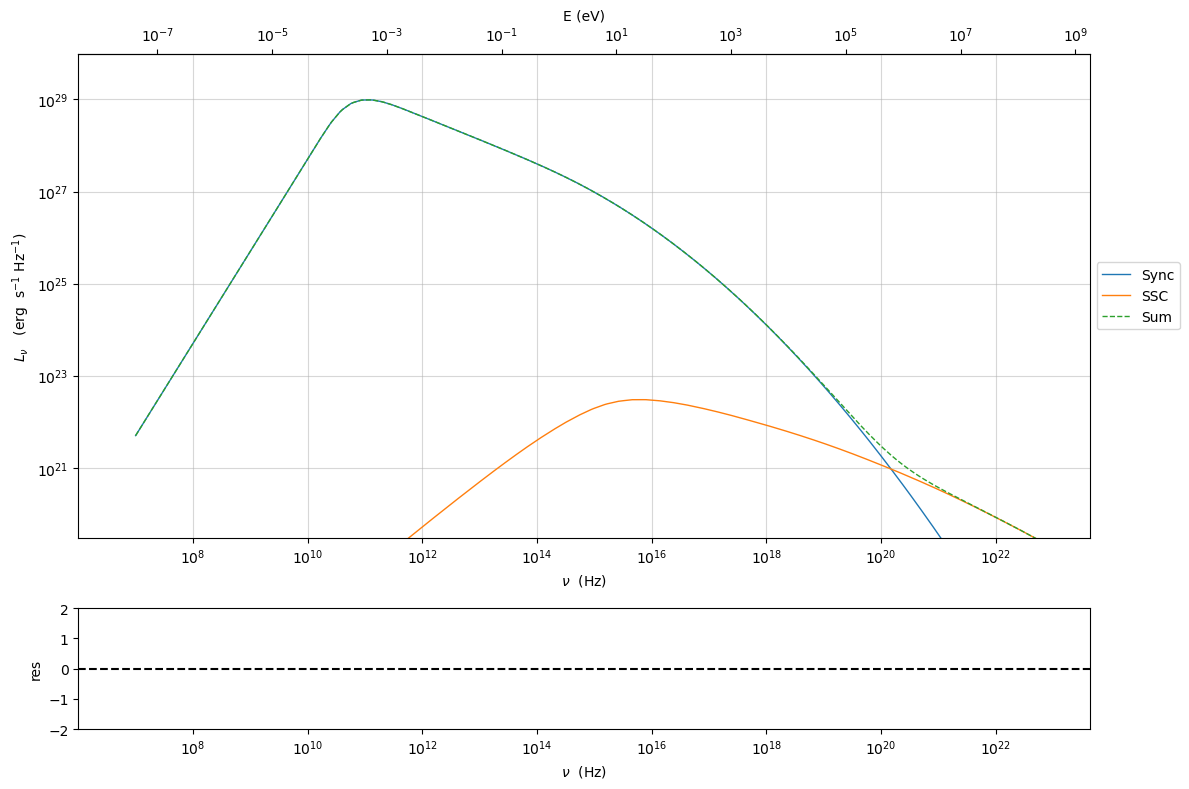

In [18]:
my_plot=my_jet.plot_model(frame='src',density=True)


In [19]:
my_jet.list_spectral_components()


Sum
Sync
SSC


In [20]:
Sync=my_jet.spectral_components.Sync


In [21]:
Sync=my_jet.get_spectral_component_by_name('Sync')


In [22]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

(1e-20, 1e-13)

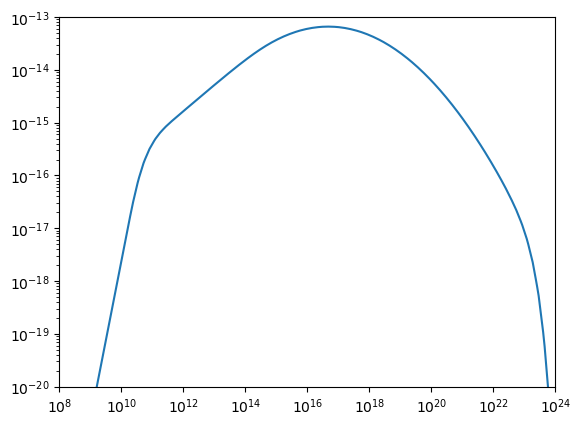

In [23]:
%matplotlib inline
plt.loglog(nu_sync,nuFnu_sync)
plt.xlim(1E8,1E24)
plt.ylim(1E-20,1E-13)

In [24]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [25]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [26]:
t_obs[::10]


nu,Sum,Sync,SSC
Hz,erg / (s cm2),erg / (s cm2),erg / (s cm2)
float64,float64,float64,float64
1000000.0,0.0,0.0,0.0
3026648.059395689,0.0,0.0,0.0
9160598.47544371,1.8603797396558676e-27,1.8603797396558676e-27,0.0
27725907.59860481,5.1595363417357764e-26,5.1595363417357764e-26,0.0
83916564.42830162,1.431379827478216e-24,1.431379827478216e-24,0.0
253985906.87807292,3.9735563564626905e-23,3.9735563564626905e-23,0.0
768725952.1663721,1.1046717952023323e-21,1.1046717952023323e-21,0.0
2326662911.331458,3.080805682170684e-20,3.080805682170684e-20,0.0


In [27]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [28]:
t_obs['Sync'][::10].to('GeV/cm2 s')

<Quantity [0.00000000e+00, 0.00000000e+00, 1.16115770e-24, 3.22032929e-23,
           8.93397018e-22, 2.48009881e-20, 6.89481903e-19, 1.92288766e-17,
           5.39546375e-16, 1.43971905e-14, 1.47242935e-13, 4.30811381e-13,
           7.93047558e-13, 1.37869693e-12, 2.38858295e-12, 4.11308030e-12,
           6.97841919e-12, 1.14712371e-11, 1.77765107e-11, 2.52478913e-11,
           3.26862082e-11, 3.85098848e-11, 4.11054360e-11, 3.98670033e-11,
           3.51138251e-11, 2.79676055e-11, 2.01954050e-11, 1.32229620e-11,
           7.82247636e-12, 4.18742550e-12, 2.03022312e-12, 8.88984658e-13,
           3.51622913e-13, 1.25682603e-13, 3.99830638e-14, 1.00017129e-14,
           1.00606284e-15, 3.47082969e-18, 1.59218601e-25, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00] GeV / (s cm2)>

In [29]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite=True)


In [30]:
my_jet.energetic_report()


name,type,units,val
BulkLorentzFactor,jet-bulk-factor,,1.000000e+01
U_e,Energy dens. blob rest. frame,erg / cm3,4.950261e-01
U_p_cold,Energy dens. blob rest. frame,erg / cm3,1.503276e+00
U_B,Energy dens. blob rest. frame,erg / cm3,1.591549e-03
U_Synch,Energy dens. blob rest. frame,erg / cm3,4.386835e-03
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,4.386835e+01
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_DT,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_CMB,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


In [31]:
my_jet.energetic_report_table


name,type,units,val
str17,str29,object,float64
BulkLorentzFactor,jet-bulk-factor,,1.000000e+01
U_e,Energy dens. blob rest. frame,erg / cm3,4.950261e-01
U_p_cold,Energy dens. blob rest. frame,erg / cm3,1.503276e+00
U_B,Energy dens. blob rest. frame,erg / cm3,1.591549e-03
U_Synch,Energy dens. blob rest. frame,erg / cm3,4.386835e-03
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,4.386835e+01
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_DT,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


In [32]:
my_jet.save_model('test_model.pkl')


In [33]:
my_jet_new=Jet.load_model('test_model.pkl')
my_jet_new.eval()

===> setting C threads to 12


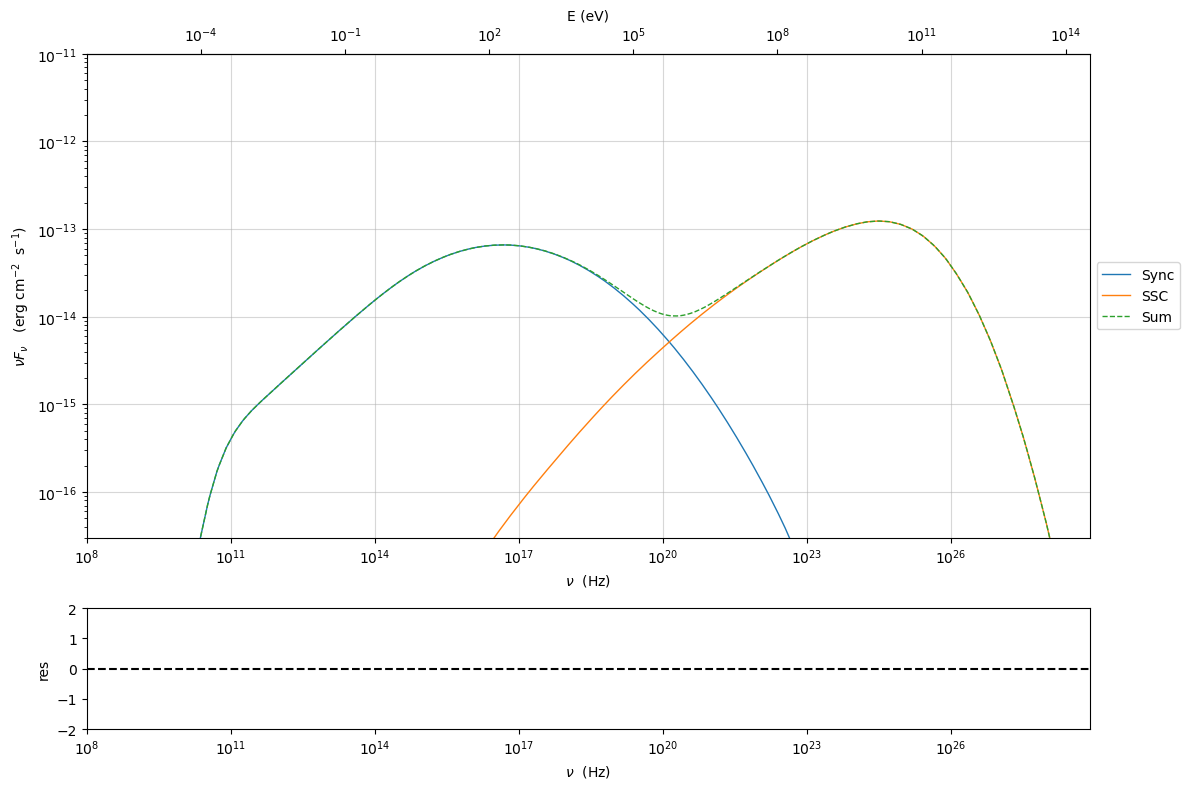

In [34]:
my_plot=my_jet_new.plot_model()
my_plot.setlim(y_max=1E-11,y_min=3E-17,x_min=1E8)

## Define custom emiotters distribution

See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/custom_emitters_distr/custom_emitters.html

In [35]:
from jetset.jet_emitters import EmittersDistribution


In [36]:
def distr_func_super_exp(gamma,gamma_cut,s,a):
    return np.power(gamma,-s)*np.exp(-(1/a)*(gamma/gamma_cut)**a)

In [37]:
n_e_super_exp=EmittersDistribution('super_exp',spectral_type='plc',normalize=False)
n_e_super_exp.add_par('gamma_cut',par_type='turn-over-energy',val=50000.,vmin=1., vmax=None, unit='lorentz-factor')
n_e_super_exp.add_par('s',par_type='LE_spectral_slope',val=2.3,vmin=-10., vmax=10, unit='')
n_e_super_exp.add_par('a',par_type='spectral_curvature',val=1.8,vmin=0., vmax=100., unit='')

In [38]:
n_e_super_exp.set_distr_func(distr_func_super_exp)


In [39]:
n_e_super_exp.parameters.show_pars()


name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
gamma_cut,turn-over-energy,lorentz-factor*,5.000000e+04,1.000000e+00,--,False,False
s,LE_spectral_slope,,2.300000e+00,-1.000000e+01,1.000000e+01,False,False
a,spectral_curvature,,1.800000e+00,0.000000e+00,1.000000e+02,False,False


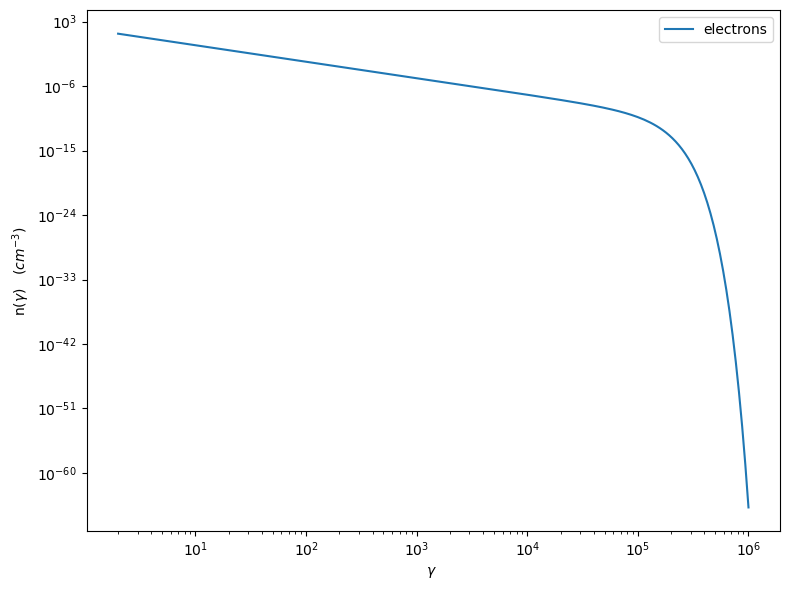

In [40]:
p=n_e_super_exp.plot()


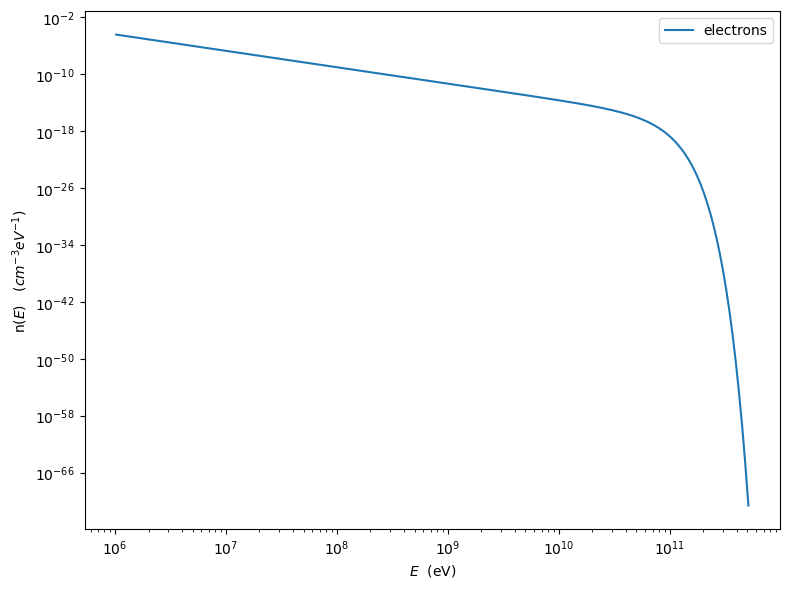

In [41]:
p=n_e_super_exp.plot(energy_unit='eV')


In [42]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution=n_e_super_exp)

===> setting C threads to 12


In [43]:
n_e_super_exp.normalize

False

In [44]:
my_jet.electron_distribution.normalize

False

In [45]:
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  
geometry: spherical  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  False
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,5.000000e+04,0.000000e+00,--,False,False
jet_leptonic,gamma_cut,turn-over-energy,lorentz-factor*,5.000000e+04,1.000000e+00,--,False,False


--------------------------------------------------------------------------------


In [46]:
my_jet.eval()


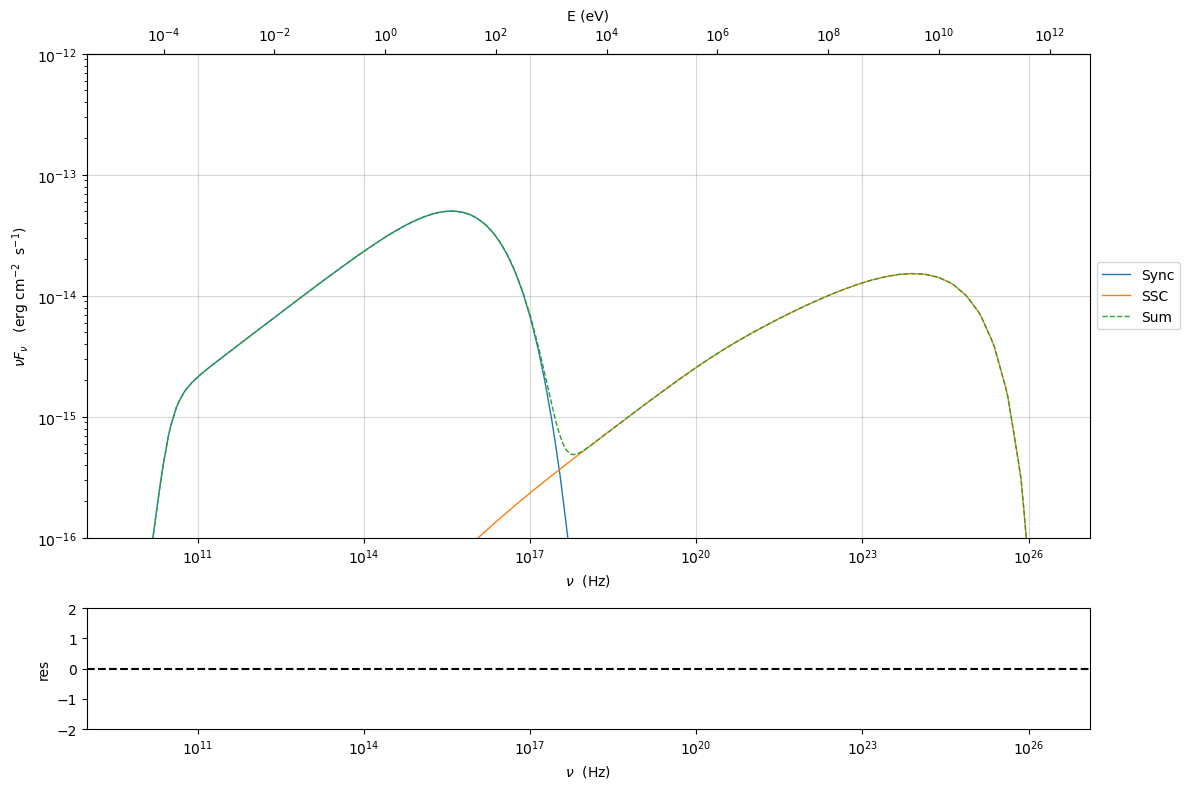

In [47]:
p=my_jet.plot_model()
p.setlim(y_min=1E-16,y_max=1E-12)

In [48]:
my_jet.electron_distribution.normalize=True

In [49]:

my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  
geometry: spherical  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,5.000000e+04,0.000000e+00,--,False,False
jet_leptonic,gamma_cut,turn-over-energy,lorentz-factor*,5.000000e+04,1.000000e+00,--,False,False


--------------------------------------------------------------------------------


In [50]:
my_jet.plot_model(p,comp='Sum',label='Normalized distr')
p.setlim(y_min=1E-16,y_max=1E-12)

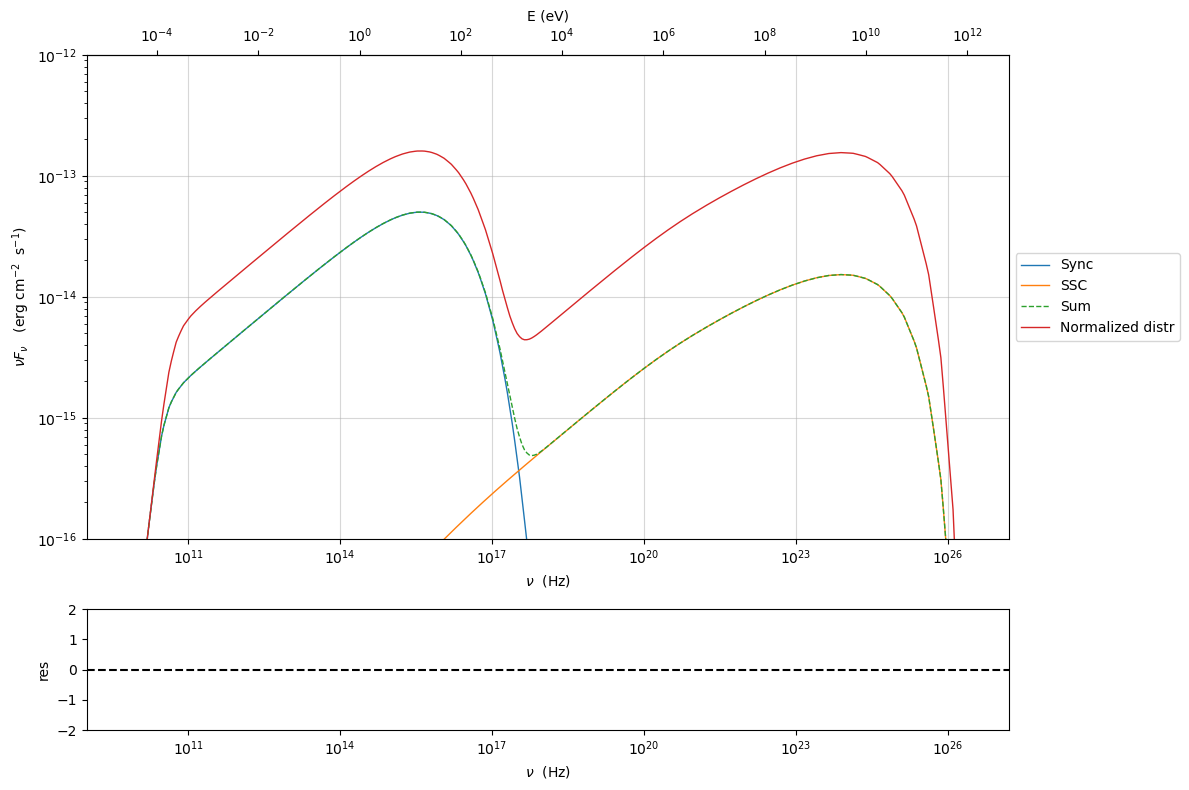

In [51]:
p.fig